In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# خواندن داده

In [2]:
transaction_data = pd.read_csv("Original Data/transaction_data.csv")
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [3]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


# ساخت داده جدید

In [114]:
#tmp = {i:0 for i in range (0, int(max(transaction_data['DAY'].unique()))+1)}
tmp_dict = [{i:0 for i in range (0, int(max(transaction_data['DAY'].unique()))+1)} for i in range(int(max(transaction_data['household_key'].unique()))+1)]

In [117]:
index = 0
for index, row in transaction_data.iterrows():
    household_key = row['household_key']
    day = row['DAY']
    value = row['SALES_VALUE']
    tmp_dict[int(household_key)][int(day)] += value
    index += 1
    if index % 100000 == 0:
        print (f'index : {index}')
  

index : 100000
index : 200000
index : 300000
index : 400000
index : 500000
index : 600000
index : 700000
index : 800000
index : 900000
index : 1000000
index : 1100000
index : 1200000
index : 1300000
index : 1400000
index : 1500000
index : 1600000
index : 1700000
index : 1800000
index : 1900000
index : 2000000
index : 2100000
index : 2200000
index : 2300000
index : 2400000
index : 2500000


In [122]:
index = 0
for house in transaction_data['household_key'].unique():
    dic = tmp_dict[int(house)]
    tmp_df = pd.DataFrame({'day':dic.keys(), 'value':dic.values()})
    tmp_df.to_csv(f'Data/data_{int(house)}.csv')
    if index % 100 == 0:
        print(f'index : {index}')
    index += 1

index : 0
index : 100
index : 200
index : 300
index : 400
index : 500
index : 600
index : 700
index : 800
index : 900
index : 1000
index : 1100
index : 1200
index : 1300
index : 1400
index : 1500
index : 1600
index : 1700
index : 1800
index : 1900
index : 2000
index : 2100
index : 2200
index : 2300
index : 2400


# استفاده از یادگیری ماشین و رگرسیون 
### در اینجا باتوجه به ضرایب معادله رگرسیون درجه 2 هر مشتری، روند خرید آن را بررسی میکنیم

In [5]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [6]:
def Regression (household_key, deg, test):
    df = pd.read_csv(f'Data/data_{household_key}.csv')
    df = df[df['value'] != 0]
    scaler = StandardScaler()
    scaler.fit_transform(df)
    poly = PolynomialFeatures(deg)
    reg = LinearRegression()
    model = make_pipeline(poly,reg)
    x = np.array(df['day'])
    y = np.array(df['value'])
    model.fit(x.reshape(-1, 1), y)
    if test == True:
        y_pred = model.predict(x.reshape(-1, 1))
        plt.scatter(x, y, c='r')
        plt.plot(x, y_pred, linewidth=4)
    return (household_key, reg.coef_)

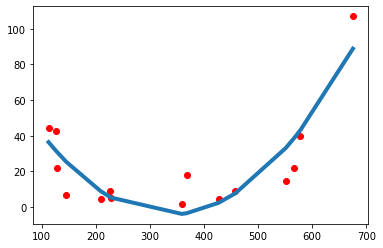

In [7]:
y = Regression(50, 2, True)

In [10]:
print(y)

(50, array([ 0.       , -0.5470007,  0.0008125]))


In [9]:
print((-1 * y[1][1] / (2 * y[1][2])))

336.6155769165746


In [12]:
coef_list = {}
index = 0
for house in transaction_data['household_key'].unique():
    y = Regression(house, 2, False)
    coef_list[y[0]] = y[1]
    if index % 100 == 0:
        print(f'index = {index}')
    index += 1

index = 0
index = 100
index = 200
index = 300
index = 400
index = 500
index = 600
index = 700
index = 800
index = 900
index = 1000
index = 1100
index = 1200
index = 1300
index = 1400
index = 1500
index = 1600
index = 1700
index = 1800
index = 1900
index = 2000
index = 2100
index = 2200
index = 2300
index = 2400


In [14]:
answer = []
for key, value in coef_list.items():
    # f(x) = value[0] + x*value[1] + x^2 * value[2]
    atf = (-1 ** value[1]) / (2 * value[2])
    center = 360
    ans = 0
    if atf <= center:
        if value[2] > 0:
            ans = 1
        else:
            print(key, value)
            ans = 0
    else:
        if value[2] > 0:
            ans = 0
            print('S', key, value)
        else:
            ans = 1
    answer.append(ans)
answer

2009 [ 0.          0.50266943 -0.00181071]
1863 [ 0.          1.06883491 -0.00197349]
359 [ 0.         -0.00032492 -0.0285929 ]
102 [ 0.          1.37809031 -0.00639624]
948 [ 0.00000000e+00 -4.80021777e-06 -2.03529233e-03]
313 [ 0.         16.56606988 -0.12062766]
2265 [ 3.46944695e-18 -1.72933153e-04 -2.19625105e-02]
298 [ 0.          8.03810155 -0.02309605]
1897 [0. 0. 0.]
1830 [0. 0. 0.]
1052 [ 0.          6.05189961 -0.01997988]
494 [0. 0. 0.]
973 [ 0.          1.34391348 -0.00141847]
2365 [ 0.          4.48788697 -0.01395665]
1645 [ 0.          1.27468832 -0.00153939]
1813 [ 0.          1.27831367 -0.00151663]
1035 [ 0.         43.72073191 -0.07070264]


<ipython-input-14-1d674793928a>:4: RuntimeWarning: divide by zero encountered in double_scalars
  atf = (-1 ** value[1]) / (2 * value[2])


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [15]:
outdf = pd.DataFrame({'household_key' : coef_list.keys(), 'coef' : coef_list.values(), 'ascending' : answer})
outdf.head()

,household_key,coef,ascending
0,2375,"[0.0, -0.18146316256944925, 0.0001846139274673...",1
1,1364,"[0.0, -0.009053963110487626, 1.299604406634769...",1
2,1130,"[0.0, -0.0723539589202009, 9.318656231524576e-05]",1
3,1173,"[0.0, 0.15195838588749555, -0.0002252441935172...",1
4,98,"[0.0, 0.05924048512020125, -5.971216619774662e...",1


In [16]:
outdf['ascending'].sum()

2483

In [17]:
descending = outdf[outdf['ascending'] == 0]
descending.to_csv('descending_householders.csv')

In [18]:
descending.shape

(17, 3)

In [19]:
ascending = outdf[outdf['ascending'] == 1]
ascending.to_csv('ascending_householders.csv')

In [20]:
ascending.shape

(2483, 3)

(2009, array([ 0.        ,  0.50266943, -0.00181071]))

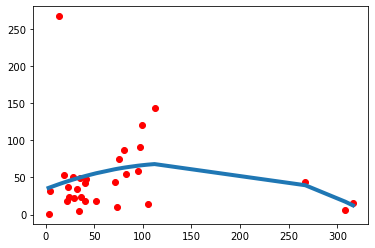

In [14]:
Regression(2009, 2, True)

In [43]:
outdf.to_csv('householders_coefs.csv')